In [23]:
import tensorflow as tf
import sklearn.metrics
import seaborn as sn
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0



In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.9133 - val_loss: 0.1513 - val_accuracy: 0.9553
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1445 - accuracy: 0.9579 - val_loss: 0.1034 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1102 - accuracy: 0.9660 - val_loss: 0.0852 - val_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0912 - accuracy: 0.9721 - val_loss: 0.0820 - val_accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.9760 - val_loss: 0.0768 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0680 - accuracy: 0.9786 - val_loss: 0.0710 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0605 - accuracy: 0.9807 - val_loss: 0.0682 - val_accuracy:

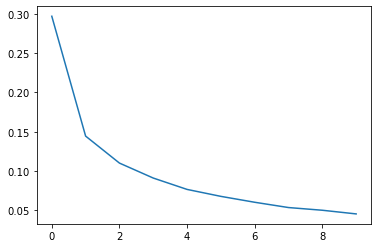

In [27]:
plt.plot(r.history['loss'])

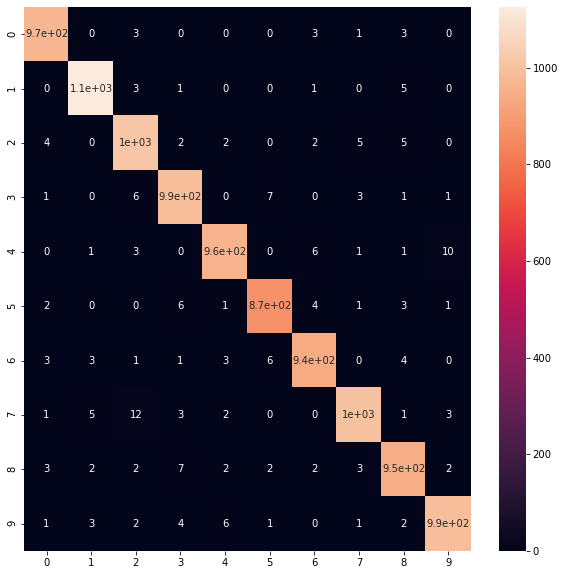

In [36]:
p_test = model.predict(x_test).argmax(axis=1)
cm = sklearn.metrics.confusion_matrix(y_test,p_test)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True);

In [31]:
cm

array([[ 970,    0,    3,    0,    0,    0,    3,    1,    3,    0],
       [   0, 1125,    3,    1,    0,    0,    1,    0,    5,    0],
       [   4,    0, 1012,    2,    2,    0,    2,    5,    5,    0],
       [   1,    0,    6,  991,    0,    7,    0,    3,    1,    1],
       [   0,    1,    3,    0,  960,    0,    6,    1,    1,   10],
       [   2,    0,    0,    6,    1,  874,    4,    1,    3,    1],
       [   3,    3,    1,    1,    3,    6,  937,    0,    4,    0],
       [   1,    5,   12,    3,    2,    0,    0, 1001,    1,    3],
       [   3,    2,    2,    7,    2,    2,    2,    3,  949,    2],
       [   1,    3,    2,    4,    6,    1,    0,    1,    2,  989]])